
Analyzing the Stroop Effect

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.



Forming the Hypothesis

In the next couple of sections, the goal is to define the independent and dependent variables, formulate an appropriate hypthesis(based on the information at hand), and determine the an effective statistical test to test this investigation.

What are the dependent and independent variables?
The dependent variable is the time taken by a subject to read through the words displayed.The independent variable is the condition of the word, incongruent or congruent. 

What is the Hypothesis?
For this project, the hypothesis question I would like to ask is "Are the congruent and incongruent populations the same? Or is there any difference?". 

Therefore, for this test, the following notation is contemplated:

$$H_0: \mu_{C} - \mu_{I} = 0$$$$H_1: \mu_{C} - \mu_{I} \neq 0$$
The null of our hypothesis is that $\mu_{C}$ (congruent mean) minus $ \mu_{I} $ (incongruent mean) is equal to 0, and the alternative is $\mu_{C}$ (congruent) minus $ \mu_{I} $ (incongruent) is not equal to zero.

## Statistical Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

df = pd.read_csv('stroopdata.csv')

df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
df.shape

(24, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [5]:
df.head(24)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


Since the data set has about 24 rows, we notice that the data in schewed in favor of the Incongruent group.I.e the vales are much higher for the Incongruent group. 

Lets assume for now that the alternative hypothesis is true. 

$\mu_{C}$ (congruent) minus $ \mu_{I} $ (incongruent) is not equal to zero.

In [8]:
# Congruent Mean value
con_mean = df.Congruent.mean()
con_mean

14.051125000000004

In [9]:
# InCongruent Mean value
incon_mean = df.Incongruent.mean()
incon_mean

22.01591666666667

In [10]:
# observed difference between both the group 'means'
obs_diff = incon_mean - con_mean
obs_diff

7.964791666666665

Lets plot the values into a Histogram

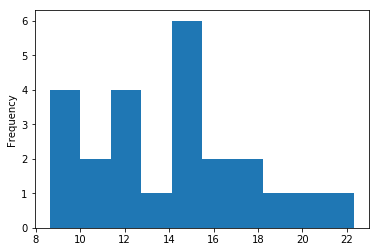

In [14]:
df['Congruent'].plot(kind = 'hist');

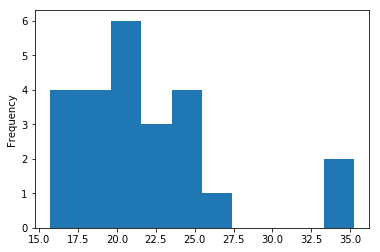

In [15]:
df['Incongruent'].plot(kind = 'hist');

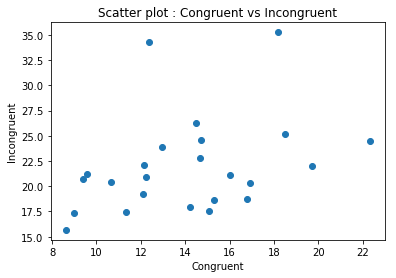

In [18]:
plt.scatter(x=df['Congruent'], y=df['Incongruent']);
plt.xlabel('Congruent')
plt.ylabel('Incongruent')
plt.title('Scatter plot : Congruent vs Incongruent');

Result: With this scatter plot we notie that there is a weak relationship between both the groups

Next,A method called 'boostrapping' is used. Since the dataset has only limited infomation,this method allows us to treat the dataset as an entire population. 

According to wikipedia: https://en.wikipedia.org/wiki/Bootstrapping_(statistics)

In statistics, bootstrapping is any test or metric that relies on random sampling with replacement. Bootstrapping allows assigning measures of accuracy (defined in terms of bias, variance, confidence intervals, prediction error or some other such measure) to sample estimates.This technique allows estimation of the sampling distribution of almost any statistic using random sampling methods.Generally, it falls in the broader class of resampling methods.


In [12]:
#Check the distribution of the difference in means using bootstrap sampling.(Note: the number of iterations set is 10000)
diffs = []

for _ in range(10000):
    boot_sample = df.sample(df.shape[0], replace = True)
    boot_con_mean = boot_sample.Congruent.mean()
    boot_incon_mean = boot_sample.Incongruent.mean()
    diffs.append(boot_incon_mean - boot_con_mean)

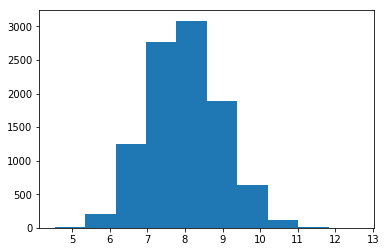

In [13]:
plt.hist(diffs);

The histogram shows that sample distribution for this dataset supports the Central Limit Theorem. 

From wikipedia: https://en.wikipedia.org/wiki/Central_limit_theorem
In probability theory, the central limit theorem (CLT) establishes that, in some situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution (informally a "bell curve") even if the original variables themselves are not normally distributed. The theorem is a key concept in probability theory because it implies that probabilistic and statistical methods that work for normal distributions can be applicable to many problems involving other types of distributions.

Therefore,with a large enough sample size, the sampling distribution of the mean will be normally distributed.

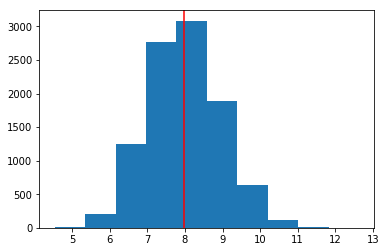

In [14]:
# Plotting the 'observed difference' value in the above histogram of differene of means
plt.hist(diffs);
plt.axvline(obs_diff, color='red');

In [41]:
# Calculating p-value of the dataset 
p_value=(np.array(diffs)>obs_diff).mean()
p_value

0.488

According to wikipedia: https://en.wikipedia.org/wiki/P-value
    
In statistical hypothesis testing, the p-value or probability value or asymptotic significance is the probability for a given statistical model that, when the null hypothesis is true, the statistical summary (such as the sample mean difference between two compared groups) would be the same as or of greater magnitude than the actual observed results.    

The value that was calculated above is known as the p-value. 
The p-value is the probability of observing a statistic (or one more extreme in favor of the alternative) if the null is true.
In this case,from the observed p-value,the probability of observing that congruent and incongruent groups are the same is about 48.8(~49) %.

Therefore, we can conclude that there is no statistical significance between the two groups since the p-value is high.


## Perform the statistical test and report your results

In [15]:
np.percentile(diffs, 2.5), np.percentile(diffs, 97.5)

(6.1877062500000015, 9.960034375000003)

Considering a Type-I error rate of .05 (95% confidence interval), we can conclude that the null hypothesis be rejected in favor of the alternative.

The data suggests that the two groups are not equal to each other.

The observed difference value of 7.964791 we note that our observed difference falls within our 95% confidence interval. 

With the test above we have statistical proof that both the groups(Congruent/Incrongruent) are not the same and that the incongruent group data shows that the group needs more time to complete the Stroop test.


## Calculate the variance and standard deviation of the original sample and the bootstrapped data(population)

In [21]:
#Standard deviation
df['Congruent'].var(),df['Congruent'].std()

(12.669029070652174, 3.559357957645195)

In [22]:
#Varience 
df['Incongruent'].var(),df['Incongruent'].std()

(23.011757036231884, 4.797057122469138)

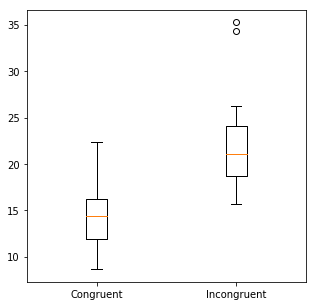

In [28]:
# Boxplot graph

bp_data = [df['Congruent'],df['Incongruent']]

# Create a figure instance
fig = plt.figure(1, figsize=(5, 5))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(bp_data);
plt.xticks([1, 2], ['Congruent', 'Incongruent']);

In [25]:
# For diff (population)
np.var(diffs, ddof=1), np.std(diffs, ddof=1)

(0.9470099867860601, 0.9731443812641885)


In the value calculated above, we note that the bootstrapping method gives a lower value for standard deviation and variance

Standard deviation is a measure that is used to quantify the amount of variation or dispersion of a set of data values(spread)

and the variance is the average of the squared differences from the mean.

Below is a boxplot of the bootstrapped sample data

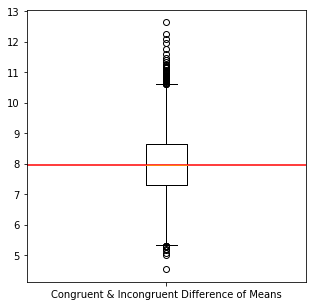

In [27]:
# Boxplot

# Create a figure instance
fig = plt.figure(1, figsize=(5, 5))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(diffs);

plt.xticks([1], ['Congruent & Incongruent Difference of Means']);
plt.axhline(y=obs_diff, color='red');

## Linear Regression Model

From the Boxplot, we note that graph has normal distribution of the bootstrapped data. 

The observed difference of the means of the two groups is shown by the red line.


In [49]:
#Linear Regression Model

import statsmodels.api as sms;

df['intercept'] = 1

lm = sms.OLS(df['Incongruent'], df[['intercept', 'Congruent']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Incongruent   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     3.108
Date:                Mon, 18 Jun 2018   Prob (F-statistic):             0.0918
Time:                        23:30:03   Log-Likelihood:                -69.590
No. Observations:                  24   AIC:                             143.2
Df Residuals:                      22   BIC:                             145.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     15.3535      3.894      3.943      0.001       7.278      23.429
Congruent      0.4742      0.269      1.763      0.092      -0.084       1.032
==============================================================================
Omnibus:                       15.513   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.580
Skew:                           1.593   Prob(JB):                     0.000414
Kurtosis:                       5.330   Cond. No.                         60.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


From this linear regression model data, the predicted amount of seconds for the incongruent group is equal to 15.3535.

That means if the amount of seconds for the congruent group is equal to 0, we can predict using this model that the amount of seconds in the incongruent group are 15.3535. 

For every 1 second increase in the congruent group, we can expect that the amount of seconds for the incongruent group would increase by .4742.

The p-values shown in this model indicates that the incongruent group is statistically significant for predicting the congruent group. 

The R-squared value of 0.124. This values is pretty close to zero. Therefore, We can reject the null hypothesis.

## Conclusion

Based on the results, we can reject the null hypothesis.At the start of the analysis, we noted from the dataset, that the 'Incongruent' column had higher values compared to the 'Congruent'

Therefore, the final result that we reject the Null hypothesis was on expected lines.
Using bootstrapping to get the distribution of the difference of means, with a 95% confidence interval (A Type-I Error rate of .05). The observed mean difference was found to be within this confidence interval. This is statistical evidence that both the groups are not same.

Additionally, this results gives us more insights into Selective Attention (https://explorable.com/selective-attention)

https://www.simplypsychology.org/attention-models.html

Selective attention is a cognitive process in which a person attends to one or a few sensory inputs while ignoring the other ones. Selective attention can be likened to the manner by which a bottleneck restricts the flow rate of a fluid.

Another theory associated is Treisman's Attenuation Theory ( https://en.wikipedia.org/wiki/Attenuation_theory)

Anne Treisman proposed her selective attention theory in 1964. His theory is based on the earlier model by Broadbent. Treisman also believed that this human filter selects sensory inputs on the basis of physical characteristics. However, she argued that the unattended sensory inputs (the ones that were not chosen by the filter and remain in the sensory buffer) are attenuated by the filter rather than eliminated. Attenuation is a process in which the unselected sensory inputs are processed in decreased intensity. For instance, if you selectively attend to a ringing phone in a room where there's TV, a crying baby, and people talking, the later three sound sources are attenuated or decreased in volume. However, when the baby's cry goes louder, you may turn your attention to the baby because the sound input is still there, not lost

## Limitation

This dataset used is not absolute. It does not contain all possible data in the world. The scope of this dataset is limited and as such the results are limited as well. 

All data in the dataset is considered to be valid. I have not verified the methods used to collect this data. My assumption is that the curated dataset is collected by fair means and not involved in any dispute.